In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from import_data import import_data
from feature_selection import feature_selection

RANDOM_STATE = 1410

dataset = "Euro28"
data, results = import_data(dataset)
X = data.reshape(100,300)
y = results

X_t = feature_selection(X=X, y=y, random_state=RANDOM_STATE)

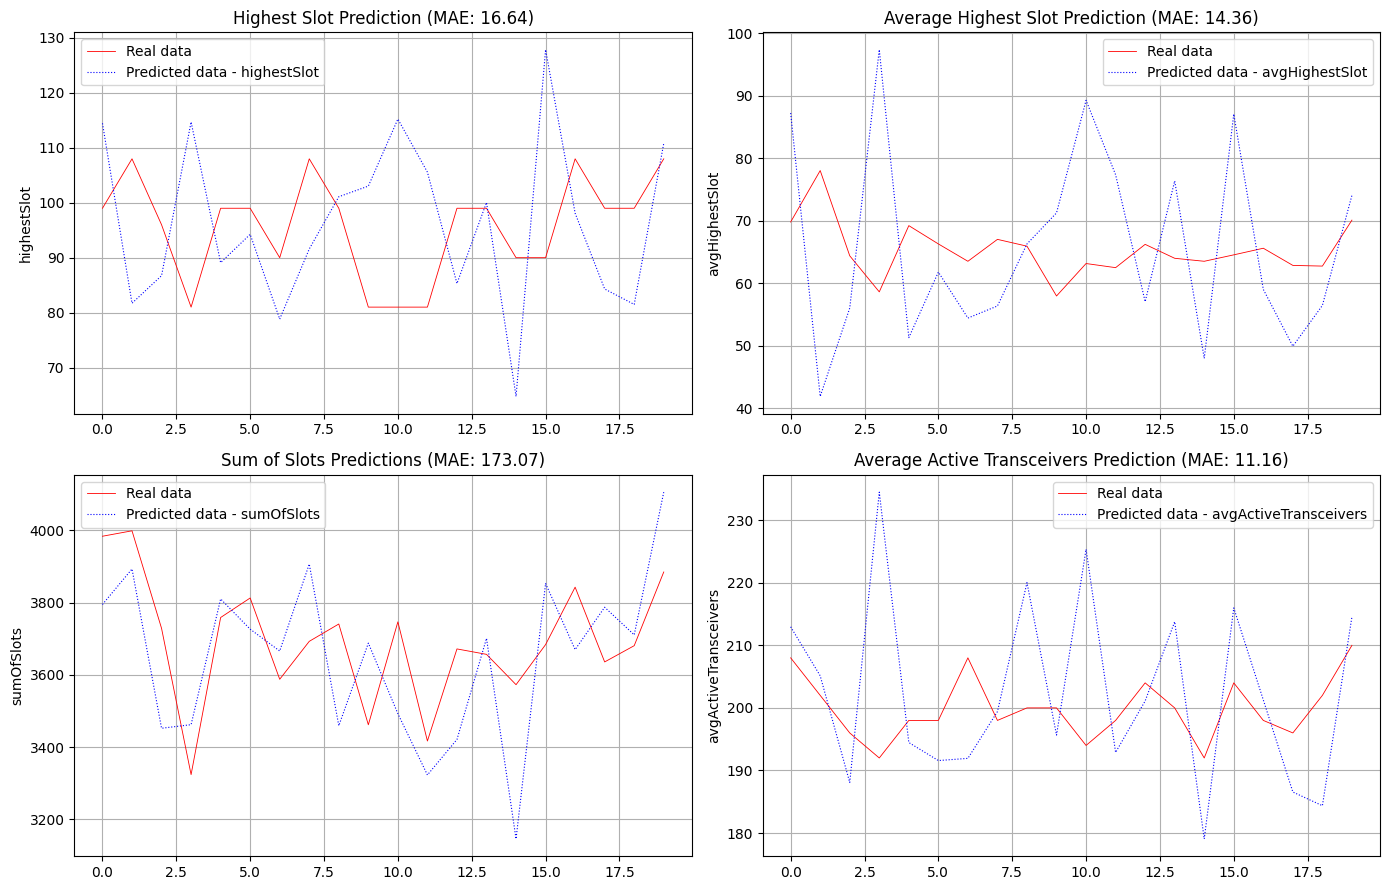

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE
)

mlp = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=100, batch_size=30, max_iter=1000, random_state=RANDOM_STATE))
model = mlp.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig, ax = plt.subplots(2,2, figsize=(14,9))

# Highest Slot
ax[0,0].plot(y_test[:,0], color="red", linewidth=0.6, label="Real data")
ax[0,0].plot(y_pred[:,0], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - highestSlot")
ax[0,0].set_ylabel("highestSlot")
ax[0,0].set_title(f"Highest Slot Prediction (MAE: {round(mean_absolute_error(y_test[:,0], y_pred[:,0]), 2)})")
ax[0,0].grid()
ax[0,0].legend()

# Average Highest Slot
ax[0,1].plot(y_test[:,1], color="red", linewidth=0.6, label="Real data")
ax[0,1].plot(y_pred[:,1], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - avgHighestSlot")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"Average Highest Slot Prediction (MAE: {round(mean_absolute_error(y_test[:,1], y_pred[:,1]), 2)})")
ax[0,1].grid()
ax[0,1].legend()

# Sum of Slots
ax[1,0].plot(y_test[:,2], color="red", linewidth=0.6, label="Real data")
ax[1,0].plot(y_pred[:,2], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - sumOfSlots")
ax[1,0].set_ylabel("sumOfSlots")
ax[1,0].set_title(f"Sum of Slots Predictions (MAE: {round(mean_absolute_error(y_test[:,2], y_pred[:,2]), 2)})")
ax[1,0].grid()
ax[1,0].legend()

# Average Active Transceivers
ax[1,1].plot(y_test[:,3], color="red", linewidth=0.6, label="Real data")
ax[1,1].plot(y_pred[:,3], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - avgActiveTransceivers")
ax[1,1].set_ylabel("avgActiveTransceivers")
ax[1,1].set_title(f"Average Active Transceivers Prediction (MAE: {round(mean_absolute_error(y_test[:,3], y_pred[:,3]), 2)})")
ax[1,1].grid()
ax[1,1].legend()

plt.tight_layout()
plt.show()
plt.savefig("prediction_without_feature_selection.png")

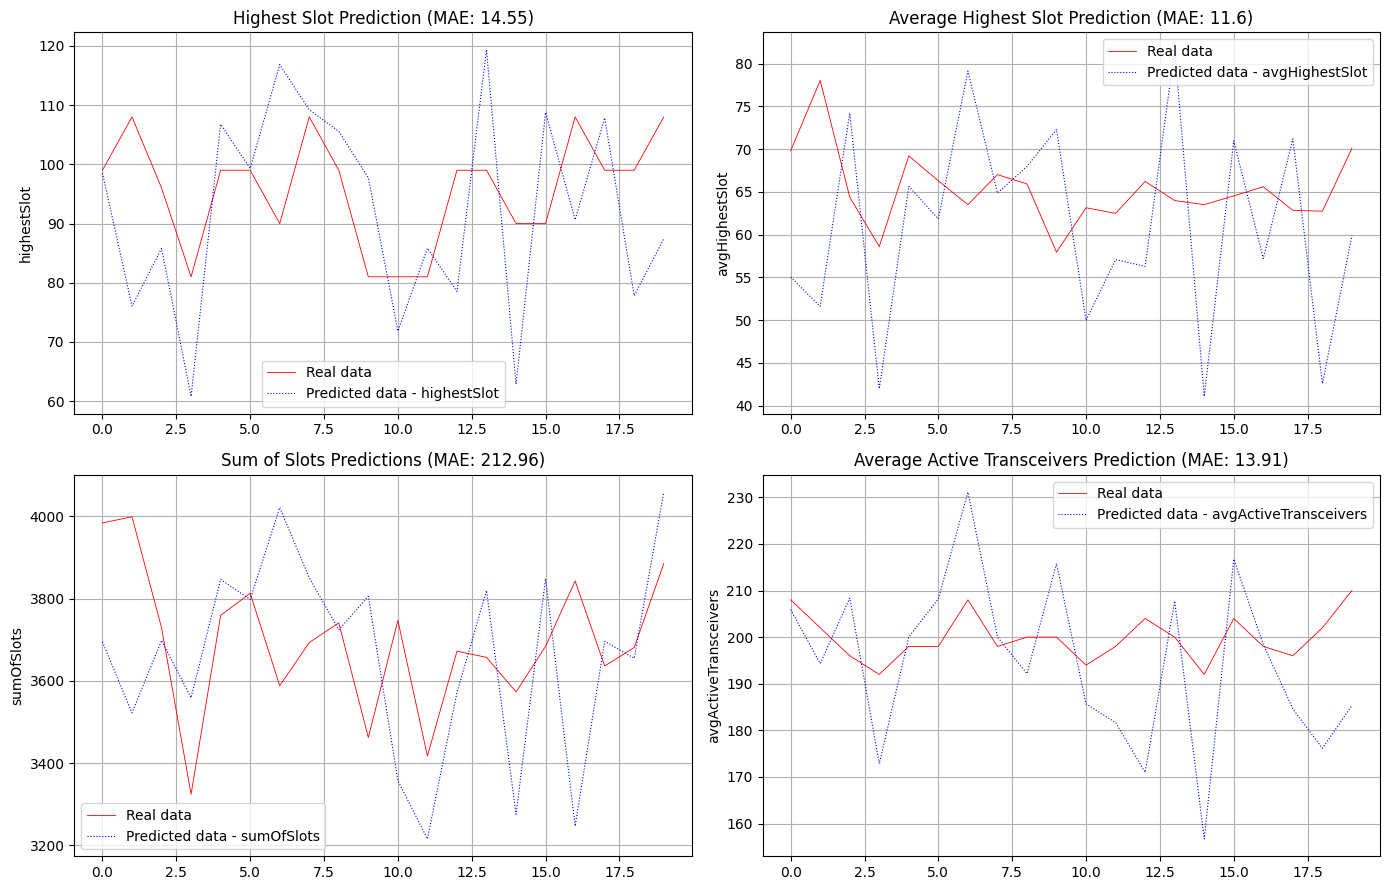

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=RANDOM_STATE
)

mlp = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=100, batch_size=30, max_iter=1000, random_state=RANDOM_STATE))
model = mlp.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig, ax = plt.subplots(2,2, figsize=(14,9))

# Highest Slot
ax[0,0].plot(y_test[:,0], color="red", linewidth=0.6, label="Real data")
ax[0,0].plot(y_pred[:,0], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - highestSlot")
ax[0,0].set_ylabel("highestSlot")
ax[0,0].set_title(f"Highest Slot Prediction (MAE: {round(mean_absolute_error(y_test[:,0], y_pred[:,0]), 2)})")
ax[0,0].grid()
ax[0,0].legend()

# Average Highest Slot
ax[0,1].plot(y_test[:,1], color="red", linewidth=0.6, label="Real data")
ax[0,1].plot(y_pred[:,1], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - avgHighestSlot")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"Average Highest Slot Prediction (MAE: {round(mean_absolute_error(y_test[:,1], y_pred[:,1]), 2)})")
ax[0,1].grid()
ax[0,1].legend()

# Sum of Slots
ax[1,0].plot(y_test[:,2], color="red", linewidth=0.6, label="Real data")
ax[1,0].plot(y_pred[:,2], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - sumOfSlots")
ax[1,0].set_ylabel("sumOfSlots")
ax[1,0].set_title(f"Sum of Slots Predictions (MAE: {round(mean_absolute_error(y_test[:,2], y_pred[:,2]), 2)})")
ax[1,0].grid()
ax[1,0].legend()

# Average Active Transceivers
ax[1,1].plot(y_test[:,3], color="red", linewidth=0.6, label="Real data")
ax[1,1].plot(y_pred[:,3], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - avgActiveTransceivers")
ax[1,1].set_ylabel("avgActiveTransceivers")
ax[1,1].set_title(f"Average Active Transceivers Prediction (MAE: {round(mean_absolute_error(y_test[:,3], y_pred[:,3]), 2)})")
ax[1,1].grid()
ax[1,1].legend()

plt.tight_layout()
plt.show()
plt.savefig("feature_selection_prediction.png")